In [27]:
import six
import sys
import time
import itertools
import pandas as pd
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive as mlrose
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve

np.random.seed(42)



In [28]:
df = pd.read_csv("./data/Breast_Cancer.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [29]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [30]:
X_num = df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive']]
X_cat = df.drop(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Status'], axis=1)
y = df['Status']

In [31]:
le = LabelEncoder()
y = le.fit_transform(y)
for col in X_cat.columns:
  X_cat[col] = le.fit_transform(X_cat[col])

In [32]:
X = pd.concat([X_num, X_cat], axis=1)
X.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Survival Months
0,68,4,24,1,2,1,0,0,0,1,3,1,1,1,59
1,50,35,14,5,2,1,1,1,2,0,2,1,1,1,61
2,58,63,14,7,2,0,2,2,4,0,2,1,1,1,74
3,58,18,2,1,2,1,0,0,0,1,3,1,1,1,83
4,47,41,3,1,2,1,1,0,1,1,3,1,1,1,49


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Backprobpagate

In [46]:
nn_model_gd = mlrose.NeuralNetwork(hidden_nodes=[100],  # Matches MLPClassifier's default
                                      activation='relu',  # Default activation in MLPClassifier
                                      algorithm='gradient_descent',  # Equivalent to using SGD with a fixed learning rate
                                      max_iters=5000,  
                                      bias=True,
                                      is_classifier=True,
                                      learning_rate=0.001,  
                                      early_stopping=True,  # Mimic MLPClassifier's behavior
                                      clip_max=5, 
                                      max_attempts=100,
                                      curve=True,
                                      random_state=42)

start_time = time.time()
nn_model_gd.fit(X_train_scaled, y_train)
end_time = time.time()
base_time = end_time-start_time
y_pred_train=nn_model_gd.predict(X_train_scaled)
gd_train = accuracy_score(y_train, y_pred_train)
print("train: ", gd_train)
y_pred = nn_model_gd.predict(X_test_scaled)
gd_base_final_score = accuracy_score(y_test, y_pred)
print(accuracy_score(y_train_subset, y_train_subset_pred))
print(gd_base_final_score)
print(base_time)

gd_fitness_curve = abs(nn_model_gd.fitness_curve)

train:  0.9221338634857521
0.8455931080185554
0.8876739562624254
74.74967098236084


In [47]:
nn_model_gd.loss

0.2168544115643815

### Randomized Hill Climbing

In [44]:
nn_model_rhc = mlrose.NeuralNetwork(hidden_nodes=[100],  # Matches MLPClassifier's default
                                      activation='relu',  # Default activation in MLPClassifier
                                      algorithm='random_hill_climb',  # Equivalent to using SGD with a fixed learning rate
                                      max_iters=5000,  
                                      bias=True,
                                      is_classifier=True,
                                      learning_rate=0.001,  
                                      early_stopping=True,  # Mimic MLPClassifier's behavior
                                      clip_max=5,  
                                      max_attempts=100,
                                      curve=True,
                                      random_state=42)

start_time = time.time()
nn_model_rhc.fit(X_train_scaled, y_train)
end_time = time.time()
base_time = end_time-start_time
y_pred_train=nn_model_rhc.predict(X_train_scaled)
rhc_train = accuracy_score(y_train, y_pred_train)
print("train: ", rhc_train)
y_pred = nn_model_rhc.predict(X_test_scaled)
rhc_base_final_score = accuracy_score(y_test, y_pred)
rhc_fitness_curve = abs(nn_model_rhc.fitness_curve)
print(rhc_base_final_score)
print(base_time)

train:  0.8402915838303512
0.8578528827037774
34.04054617881775


In [45]:
nn_model_rhc.loss

0.5204887970526566

Problem Size

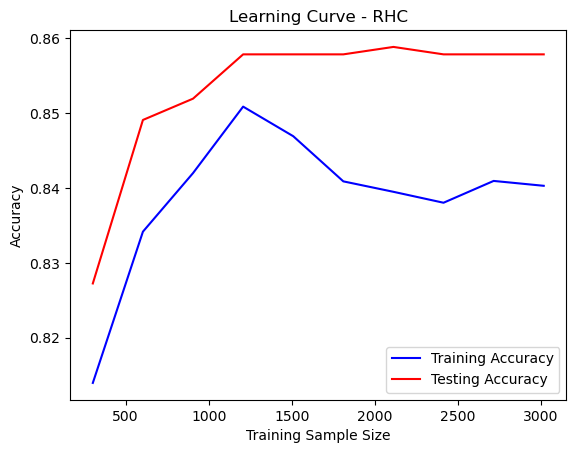

In [24]:
training_sizes = np.linspace(0.1, 1.0, 10) * len(X_train_scaled)

# Lists to store accuracies
train_accuracies = []
test_accuracies = []

# Loop over the training sample sizes
for n in training_sizes:
    # Determine the number of samples to use
    size = int(n)
    
    # Slice the training data and labels
    X_train_subset = X_train_scaled[:size]
    y_train_subset = y_train[:size]
    
    X_test_subset = X_test_scaled[:size]
    y_test_subset = y_test[:size]
    # Initialize and fit the neural network on the subset
    nn_model_rhc_ps = mlrose.NeuralNetwork(hidden_nodes=[100],
                                       activation='relu',
                                       algorithm='random_hill_climb',
                                       max_iters=5000,
                                       bias=True,
                                       is_classifier=True,
                                       learning_rate=0.001,
                                       early_stopping=True,
                                       clip_max=5,
                                       max_attempts=100,
                                       curve=True,
                                       random_state=42)
    nn_model_rhc_ps.fit(X_train_subset, y_train_subset)
    
    # Predict on the training subset and test set
    y_train_subset_pred = nn_model_rhc_ps.predict(X_train_subset)
    y_test_subset_pred = nn_model_rhc_ps.predict(X_test_subset)
    
    # Calculate and store the accuracies
    train_accuracies.append(accuracy_score(y_train_subset, y_train_subset_pred))
    test_accuracies.append(accuracy_score(y_test_subset, y_test_subset_pred))

# Plot learning curve
plt.plot(training_sizes, train_accuracies, label='Training Accuracy', color='blue')
plt.plot(training_sizes, test_accuracies, label='Testing Accuracy', color='red')
plt.xlabel('Training Sample Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - RHC')
plt.legend()
plt.show()

### Simulated Annealing

In [48]:
nn_model_sa = mlrose.NeuralNetwork(hidden_nodes=[100],  # Matches MLPClassifier's default
                                      activation='relu',  # Default activation in MLPClassifier
                                      algorithm='simulated_annealing',  # Equivalent to using SGD with a fixed learning rate
                                      max_iters=5000,  
                                      bias=True,
                                      is_classifier=True,
                                      learning_rate=0.001,  
                                      early_stopping=True,  # Mimic MLPClassifier's behavior
                                      clip_max=5,  
                                      max_attempts=100,
                                      curve=True,
                                      random_state=42)

start_time = time.time()
nn_model_sa.fit(X_train_scaled, y_train)
end_time = time.time()
base_time = end_time-start_time
y_pred_train=nn_model_sa.predict(X_train_scaled)
sa_train = accuracy_score(y_train, y_pred_train)
print("train: ", sa_train)
y_pred = nn_model_sa.predict(X_test_scaled)
sa_base_final_score = accuracy_score(y_test, y_pred)
sa_fitness_curve = abs(nn_model_sa.fitness_curve)
print(sa_base_final_score)
print(base_time)

train:  0.8455931080185554
0.8618290258449304
45.26030611991882


In [49]:
nn_model_sa.loss

0.5443360539811655

Problem size

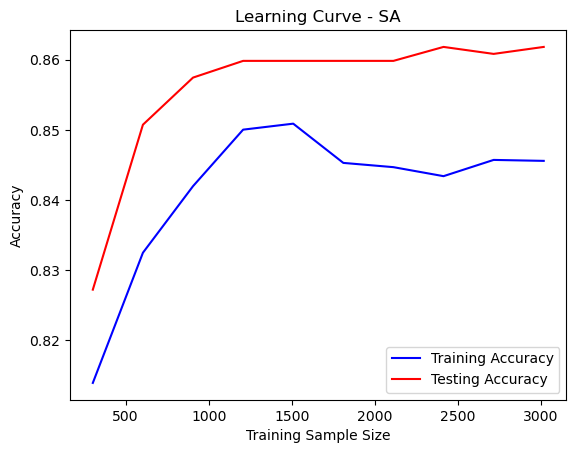

In [25]:
training_sizes = np.linspace(0.1, 1.0, 10) * len(X_train_scaled)

# Lists to store accuracies
train_accuracies = []
test_accuracies = []

# Loop over the training sample sizes
for n in training_sizes:
    # Determine the number of samples to use
    size = int(n)
    
    # Slice the training data and labels
    X_train_subset = X_train_scaled[:size]
    y_train_subset = y_train[:size]

    X_test_subset = X_test_scaled[:size]
    y_test_subset = y_test[:size]
    # Initialize and fit the neural network on the subset
    nn_model_sa_ps = mlrose.NeuralNetwork(hidden_nodes=[100],
                                       activation='relu',
                                       algorithm='simulated_annealing',
                                       max_iters=5000,
                                       bias=True,
                                       is_classifier=True,
                                       learning_rate=0.001,
                                       early_stopping=True,
                                       clip_max=5,
                                       max_attempts=100,
                                       curve=True,
                                       random_state=42)
    nn_model_sa_ps.fit(X_train_subset, y_train_subset)
    
    # Predict on the training subset and test set
    y_train_subset_pred = nn_model_sa_ps.predict(X_train_subset)
    y_test_subset_pred = nn_model_sa_ps.predict(X_test_subset)
    
    # Calculate and store the accuracies
    train_accuracies.append(accuracy_score(y_train_subset, y_train_subset_pred))
    test_accuracies.append(accuracy_score(y_test_subset, y_test_subset_pred))

# Plot learning curve
plt.plot(training_sizes, train_accuracies, label='Training Accuracy', color='blue')
plt.plot(training_sizes, test_accuracies, label='Testing Accuracy', color='red')
plt.xlabel('Training Sample Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - SA')
plt.legend()
plt.show()

### genetic alogorithm

In [43]:
nn_model_ga = mlrose.NeuralNetwork(hidden_nodes=[100],  # Matches MLPClassifier's default
                                      activation='relu',  # Default activation in MLPClassifier
                                      algorithm='genetic_alg',  # Equivalent to using SGD with a fixed learning rate
                                      max_iters=5000,  
                                      bias=True,
                                      is_classifier=True,
                                      learning_rate=0.001,  
                                      early_stopping=True,  # Mimic MLPClassifier's behavior
                                      clip_max=5,  
                                      max_attempts=100,
                                      pop_size=600,
                                        mutation_prob=0.2,
                                      curve=True,
                                      random_state=42)

start_time = time.time()
nn_model_ga.fit(X_train_scaled, y_train)
end_time = time.time()
base_time = end_time-start_time
y_pred = nn_model_ga.predict(X_test_scaled)
ga_base_final_score = accuracy_score(y_test, y_pred)
ga_fitness_curve = abs(nn_model_ga.fitness_curve)
print(ga_base_final_score)
print(base_time)

0.8330019880715706
1016.6981108188629


In [50]:
y_pred_train=nn_model_ga.predict(X_train_scaled)
ga_train = accuracy_score(y_train, y_pred_train)
print("train: ", ga_train)

train:  0.8144466534128562


In [51]:
nn_model_ga.loss

2.7693875978526434

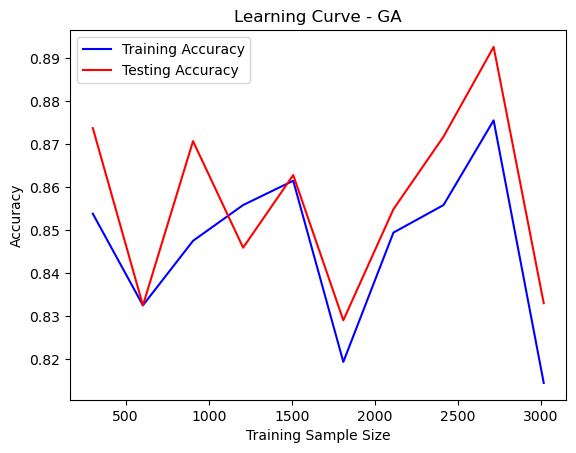

In [56]:
training_sizes = np.linspace(0.1, 1.0, 10) * len(X_train_scaled)

# Lists to store accuracies
train_accuracies = []
test_accuracies = []

# Loop over the training sample sizes
for n in training_sizes:
    # Determine the number of samples to use
    size = int(n)
    
    # Slice the training data and labels
    X_train_subset = X_train_scaled[:size]
    y_train_subset = y_train[:size]

    X_test_subset = X_test_scaled[:size]
    y_test_subset = y_test[:size]
    # Initialize and fit the neural network on the subset
    nn_model_ga_ps = mlrose.NeuralNetwork(hidden_nodes=[100],
                                       activation='relu',
                                       algorithm='genetic_alg',
                                       max_iters=5000,
                                       bias=True,
                                       is_classifier=True,
                                       learning_rate=0.001,
                                       early_stopping=True,
                                       clip_max=5,
                                       max_attempts=100,
                                       curve=True,
                                       pop_size=600,
                                       mutation_prob=0.2,
                                       random_state=42)
    nn_model_ga_ps.fit(X_train_subset, y_train_subset)
    
    # Predict on the training subset and test set
    y_train_subset_pred = nn_model_ga_ps.predict(X_train_subset)
    y_test_subset_pred = nn_model_ga_ps.predict(X_test_subset)
    
    # Calculate and store the accuracies
    train_accuracies.append(accuracy_score(y_train_subset, y_train_subset_pred))
    test_accuracies.append(accuracy_score(y_test_subset, y_test_subset_pred))

# Plot learning curve
plt.plot(training_sizes, train_accuracies, label='Training Accuracy', color='blue')
plt.plot(training_sizes, test_accuracies, label='Testing Accuracy', color='red')
plt.xlabel('Training Sample Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - GA')
plt.legend()
plt.show()

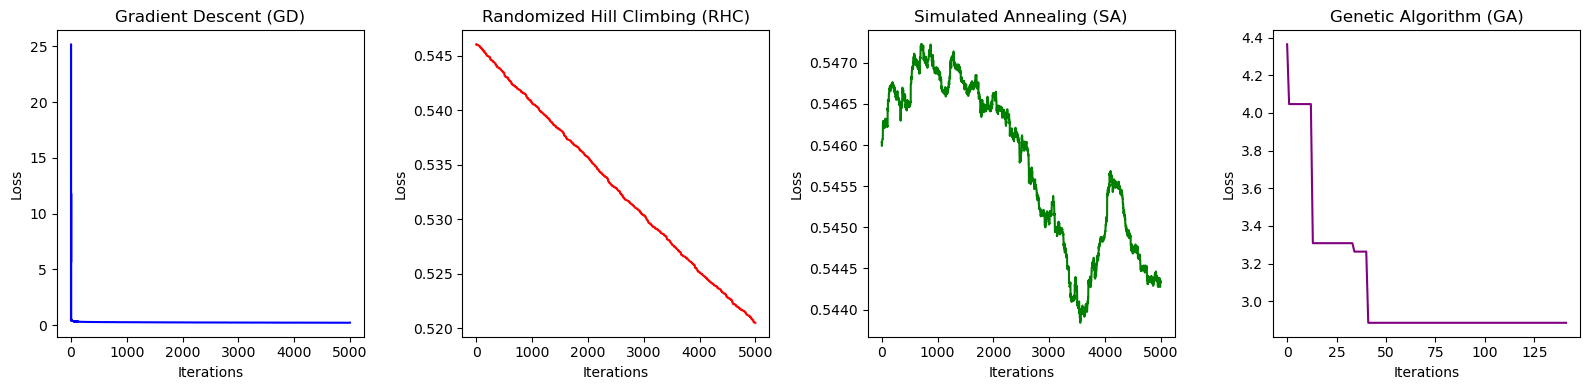

In [31]:
plt.close('all')
plt.figure(figsize=(16, 4))
# First subplot for GD
plt.subplot(1, 4, 1)
plt.plot(gd_fitness_curve, label='GD', color='blue')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Gradient Descent (GD)")  # Adding a title for clarity

# Second subplot for RHC, SA, GA
plt.subplot(1, 4, 2)
plt.plot(rhc_fitness_curve[:, 0], label='RHC', color='red')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Randomized Hill Climbing (RHC)")

# Third subplot for RHC, SA
plt.subplot(1, 4, 3)
plt.plot(sa_fitness_curve[:, 0], label='SA', color='green')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Simulated Annealing (SA)")

plt.subplot(1, 4, 4)
plt.plot(ga_fitness_curve[:, 0], label='GA', color='purple')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Genetic Algorithm (GA)")

plt.tight_layout()  # Adjust layout to not overlap

# Display the plot
plt.show()